### Bubble sort
**Алгоритм:**

Или сортировка простыми обменами. Бессмертная классика жанра. Принцип действий прост: обходим массив от начала до конца, попутно меняя местами неотсортированные соседние элементы. В результате первого прохода на последнее место «всплывёт» максимальный элемент. Теперь снова обходим неотсортированную часть массива (от первого элемента до предпоследнего) и меняем по пути неотсортированных соседей. Второй по величине элемент окажется на предпоследнем месте. Продолжая в том же духе, будем обходить всё уменьшающуюся неотсортированную часть массива, запихивая найденные максимумы в конец.

![Bubble sort](https://habrastorage.org/getpro/habr/post_images/187/5a3/929/1875a3929dd14c8ea5ff4ccc3d0db9bd.gif)

Худшее время O(n<sup>2</sup>)

Лучшее время O(n)

Среднее время O(n<sup>2</sup>)

In [168]:
def bubble_sort(array: list[int]) -> list[int]:
    flag = 0
    while flag < len(array) - 1:
        flag = 0
        for i in range(len(array) - 1):
            if array[i] > array[i+1]:
                array[i], array[i+1] = array[i+1], array[i]
            else:
                flag += 1
    return array

### Cocktail shaker sort
**Алгоритм:**

Она же сортировка перемешиванием, она же коктейльная сортировка. Начинается процесс как в «пузырьке»: выдавливаем максимум на самые задворки. После этого разворачиваемся на 180 и идём в обратную сторону, при этом уже перекатывая в начало не максимум, а минимум. Отсортировав в массиве первый и последний элементы, снова делаем кульбит. Обойдя туда-обратно несколько раз, в итоге заканчиваем процесс, оказавшись в середине списка.

![Cocktail sort](https://habrastorage.org/getpro/habr/post_images/2a9/ad7/855/2a9ad78556f13396ebc68cb4ac21e91c.gif)

Худшее время O(n<sup>2</sup>)

Лучшее время O(n)

Среднее время O(n<sup>2</sup>)

In [169]:
def cocktail_shaker_sort(array: list[int]) -> list[int]:
    c = len(array)
    b = 0
    while c > 0:
        for i in range(b, c-1):
            if array[i]>array[i+1]:
                array[i], array[i+1] = array[i+1], array[i]
        for i in range(c - 1, b, -1):
            if array[i] < array[i-1]:
                array[i], array[i - 1] = array[i-1], array[i]
        
        b += 1
        c -= 1
    
    return array

### Insertion sort
**Алгоритм:**

Проходим по массиву слева направо и обрабатываем по очереди каждый элемент. Слева от очередного элемента наращиваем отсортированную часть массива, справа по мере процесса потихоньку испаряется неотсортированная. В отсортированной части массива ищется точка вставки для очередного элемента. Сам элемент отправляется в буфер, в результате чего в массиве появляется свободная ячейка — это позволяет сдвинуть элементы и освободить точку вставки.

![Insertion sort](https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif)

Худшее время O(n<sup>2</sup>)

Лучшее время O(n)

Среднее время O(n<sup>2</sup>)

In [170]:
def insertion_sort(array: list[int]) -> list[int]:
    for i in range(1,len(array)):
        k=array[i]
        j=i-1
        while array[j]>k and j>=0:
            array[j+1]=array[j]
            j-=1
        array[j+1]=k 
    return array

### Selection sort
**Алгоритм:**

Просто и незатейливо — проходим по массиву в поисках максимального элемента. Найденный максимум меняем местами с последним элементом. Неотсортированная часть массива уменьшилась на один элемент (не включает последний элемент, куда мы переставили найденный максимум). К этой неотсортированной части применяем те же действия — находим максимум и ставим его на последнее место в неотсортированной части массива. И так продолжаем до тех пор, пока неотсортированная часть массива не уменьшится до одного элемента.

![Selection sort](https://habrastorage.org/webt/yt/cs/fz/ytcsfzyhzn9xy8opfyodmgz-a4u.gif)

Худшее время O(n<sup>2</sup>)

Лучшее время O(n<sup>2</sup>)

Среднее время O(n<sup>2</sup>)

In [171]:
def selection_sort(array: list[int]) -> list[int]:
    k=0
    while k<len(array):
        ma=-10**10
        c=0
        for i in range(0,len(array)-k):
            if array[i]>=ma:
                ma=array[i]
                c=i
        array[c],array[len(array)-k-1]=array[len(array)-k-1],array[c]
        k+=1
    return array

### Merge sort
**Алгоритм:**

Алгоритм использует принцип «разделяй и властвуй»: задача разбивается на подзадачи меньшего размера, которые решаются по отдельности, после чего их решения комбинируются для получения решения исходной задачи. Конкретно процедуру сортировки слиянием можно описать следующим образом:

 1) Если в рассматриваемом массиве один элемент, то он уже отсортирован — алгоритм завершает работу.
 2) Иначе массив разбивается на две части, которые сортируются рекурсивно.
 3) После сортировки двух частей массива к ним применяется процедура слияния, которая по двум отсортированным частям получает исходный отсортированный массив.

![Merge sort](https://upload.wikimedia.org/wikipedia/commons/c/cc/Merge-sort-example-300px.gif)


In [172]:
def merge(arr1: list[int], arr2: list[int]) -> list[int]:
    res = []
    n = min(len(arr1), len(arr2))
    i = 0
    j = 0

    while (i < n) and (j < n):
        if arr1[i] < arr2[j]:
            res.append(arr1[i])
            i += 1
        else:
            res.append(arr2[j])
            j += 1
    
    while i < len(arr1):
        res.append(arr1[i])
        i += 1
    
    while j < len(arr2):
        res.append(arr2[j])
        j += 1
    
    return res


def merge_sort(array: list[int]) -> list[int]:
    if len(array) <= 1:
        return array
    
    pivot = len(array) // 2 + (len(array) % 2)
    
    return merge(
        merge_sort(array[:pivot]),
        merge_sort(array[pivot:])
    )

In [173]:
from typing import Callable
import matplotlib.pyplot as plt
import random
import time

In [174]:
def _get_random_array(length: int) -> list[list[int]]:
    return [random.randint(1, 500) for _ in range(length)]

In [175]:
def _get_sort_time(amount_of_sort: int, sort: Callable) -> list[float]:
    times = []

    for i in range(100, amount_of_sort + 100):
        tmp_times = []
        for _ in range(3):
            now = time.time()
            sort(_get_random_array(i))
            tmp_times.append(time.time() - now)
        
        times.append(sum(tmp_times) / 3)

    return times

In [176]:
def _get_data(amount_of_sorts: int, sorts: list[Callable]) -> list[list[float]]:
    data = []
    
    for sort in sorts:
        data.append(_get_sort_time(amount_of_sorts, sort))

    return data

In [177]:
def _draw(data: list[list[float]], labels: list[str]) -> None:
    fig = plt.figure(figsize=(7,4))
    ax = fig.subplots()

    ax.set_title("Sorting analysis", fontsize="24", fontweight="17")
    ax.set_xlim(100, len(data[0]) + 100)
    ax.set_ylabel("Time", fontsize="14")
    ax.set_xlabel("Size", fontsize="14")

    plt.style.use('seaborn-v0_8-colorblind')

    for i in range(len(data)):
        ax.semilogy(range(100, len(data[i]) + 100), data[i], label=labels[i])

    ax.legend()
    plt.show()


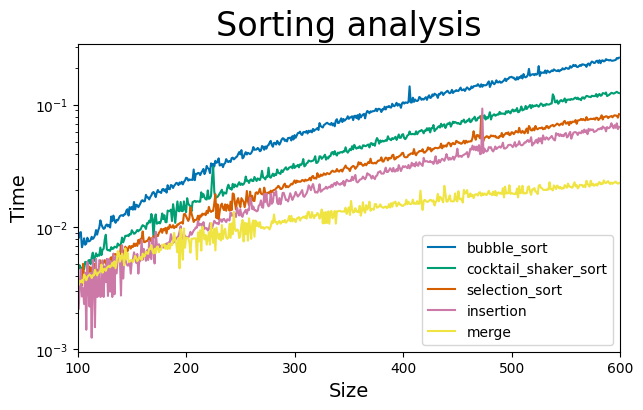

In [179]:
_draw(_get_data(500, [
    bubble_sort,
    cocktail_shaker_sort,
    selection_sort,
    insertion_sort,
    merge_sort
]), ["bubble_sort", "cocktail_shaker_sort", "selection_sort", "insertion", "merge"])